# 결과

+ best0(mae:1.81) : robust-scaling svr(kernel = linear)-> 부동산피해 천원 이상치 넘 커서 삭제
+ best0(mae:1.84) :robust-scaling svr(kernel = linear)
+ best1(mae:1.854) :standard-scaling svr(kernel = linear) -> 변수추가
+ best2(mae: 1.865) : standard-scaling svr(kernel = linear) 이 가장 결과가 좋았다

+ R에서 뽑은 변수들만 출력 :15개

["crm_clue_변사체","crm_clue_자수","crm_clue_진정","crm_clue_현행범"
    ,"vic_sx_1","강도살인_검거수","화재_사망","화재_부상","화재_부동산피해_천원","공원_개수","자살_사망률_10만명당"
         ,"자살_연령표준화사망률_10만명당","기초수급_35_59세","기초수급_60세이상","외국인수", "score_강살"]

In [1]:
import pandas as pd

#그래프에 한글 표현하기
import  matplotlib.pyplot as plt
import  matplotlib.font_manager as fm
import  matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)



#마이너스 표시하기
import  matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]  = False

import numpy as np
import pandas  as pd
import seaborn as sns
##회귀분석
import statsmodels.api as sm
# 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import  RFE
from lightgbm import LGBMClassifier,  LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR, SVC
import multiprocessing 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from scipy import stats
#사용법이 파이선과 다른 기존xgb를  파이선에 맞게 만들어 놓은 것
from  xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler

#변수영향도 그래프, 트리그래프 더 쉽게 그리게 해줌
from xgboost import plot_importance, plot_tree

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("../완성본_안전도_회귀분석/2_강도살인안전도.csv")

In [3]:
# crm_clue_변사체+crm_clue_자수+crm_clue_진정+crm_clue_현행범
#           +vic_sx_1+강도살인_검거수+화재_사망+화재_부상+화재_부동산피해_천원
#           +공원_개수+자살_사망률_10만명당+자살_연령표준화사망률_10만명당
#           +기초수급_35_59세+기초수급_60세이상+외국인수

In [4]:
#R에서 뽑은 변수들만 출력 15개 채택 
# crm_tm_저녁 추가
# 부동산피해 천원 이상치 너무 커서 삭제->성능오름
df = df[["crm_clue_변사체","crm_clue_자수","crm_clue_진정","crm_clue_현행범","crm_tm_저녁"
    ,"vic_sx_1","강도살인_검거수","화재_사망","화재_부상","공원_개수","자살_사망률_10만명당"
         ,"자살_연령표준화사망률_10만명당","기초수급_35_59세","기초수급_60세이상","외국인수", "score_강살"]]

In [4]:
# #R에서 뽑은 변수들만 출력 :10개
# df = df[["crm_clue_변사체","crm_clue_현행범","강도살인_검거수","화재_사망","화재_부상","공원_개수","자살_사망률_10만명당",
#         "자살_연령표준화사망률_10만명당","기초수급_19세이하","외국인수", "score_강살"]]

In [11]:
df

,crm_clue_변사체,crm_clue_자수,crm_clue_진정,crm_clue_현행범,crm_tm_저녁,vic_sx_1,강도살인_검거수,화재_사망,화재_부상,화재_부동산피해_천원,공원_개수,자살_사망률_10만명당,자살_연령표준화사망률_10만명당,기초수급_35_59세,기초수급_60세이상,외국인수,score_강살
0,0,0,0,2,6,4,14,2,24.0,1084718.0,148,13.5,12.2,40639,50273,15295,79.20
1,0,0,0,4,3,8,15,1,7.0,581020.0,102,16.2,14.9,40639,50273,24040,70.80
2,1,0,0,4,4,5,30,0,10.0,458268.0,96,13.7,12.2,40639,50273,18967,74.10
3,0,0,0,3,3,3,15,2,2.0,184825.0,65,6.9,7.1,56994,66509,4184,75.25
4,0,0,0,1,2,3,9,0,1.0,542237.0,55,14.4,11.6,56994,66509,3268,80.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,0,0,1,0,1,3,0,10.0,241464.0,22,13.5,11.3,43894,69254,7111,79.35
119,2,0,0,3,0,6,3,1,9.0,95365.0,54,17.6,15.4,64943,92574,9785,74.85
120,0,0,0,1,2,4,8,3,17.0,5135961.0,14,8.1,8.8,14862,28268,11496,79.75
121,1,0,0,2,1,2,10,4,16.0,403054.0,13,12.0,11.4,14071,25508,10641,75.20


<AxesSubplot:>

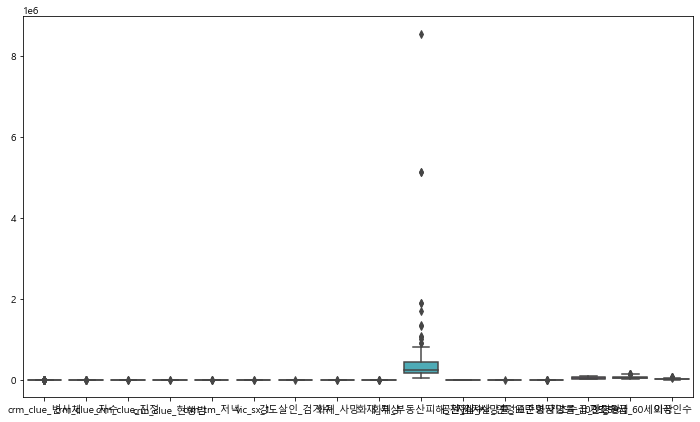

In [9]:
#이상치 확인
#극단값을  갖는  모습을 볼 수 있다 ->robustscale하면  좋을  듯  하다
plt.figure(figsize = (12,7))
sns.boxplot(data = df.iloc[:,:-1])

# 설명력 보기위한 모델링

In [37]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_강살"],test_size = 0.3, random_state=0)

# ridge, lasso, elasticnet을 위한 alpha값 찾기 함수

In [5]:
def alphas_finder(model):
    alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
    for alpha in alphas:
        modeling = model(alpha=alpha)
        modeling.fit(X_train, y_train)
        print(alpha , ":" ,round(modeling.score(X_train, y_train),3)
              , round(modeling.score(X_test, y_test),3)
              ,"mae:",round(mean_absolute_error(modeling.predict(X_test), y_test),3))    

# 교차검증

In [6]:
X = np.array(df.drop('score_강살', 1))
Y = np.array(df['score_강살'])

In [7]:
from sklearn.model_selection import KFold

#kfold 설정
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True,random_state=0)

#mae kfold 교차검증 함수
def mae_kfold(model):
    i = 1
    total_error = 0
    for train_index, test_index in kfold.split(X):
        x_train_fold, x_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = Y[train_index], Y[test_index]
        model_pred_fold = model.fit(x_train_fold, y_train_fold).predict(x_test_fold)
        error = mean_absolute_error(model_pred_fold, y_test_fold)
        print('Fold = {}, mae = {:.2f}'.format(i, error))
        total_error += error
        i+=1
    print('---'*10)
    print('Average Error: %s' % (total_error / n_splits))
    print('---'*10)

# 모델링

## 1. None scaling

In [41]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.6505103008612958 0.5030222875258237 1.8173257949618329


In [42]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.55
Fold = 2, mae = 2.35
Fold = 3, mae = 1.91
Fold = 4, mae = 1.99
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.905512476713269
------------------------------


## ridge

In [43]:
# ridge
alphas_finder(Ridge)

100 : 0.541 0.537 mae: 1.821
10 : 0.623 0.529 mae: 1.774
1 : 0.648 0.513 mae: 1.791
0.1 : 0.65 0.504 mae: 1.814
0.01 : 0.651 0.503 mae: 1.817
0.001 : 0.651 0.503 mae: 1.817
0.0001 : 0.651 0.503 mae: 1.817


In [44]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 1.68
Fold = 2, mae = 2.02
Fold = 3, mae = 1.56
Fold = 4, mae = 2.33
Fold = 5, mae = 2.00
------------------------------
Average Error: 1.9183682658591592
------------------------------
Fold = 1, mae = 1.55
Fold = 2, mae = 2.20
Fold = 3, mae = 1.78
Fold = 4, mae = 2.12
Fold = 5, mae = 1.85
------------------------------
Average Error: 1.9002304736944062
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.31
Fold = 3, mae = 1.82
Fold = 4, mae = 2.00
Fold = 5, mae = 1.77
------------------------------
Average Error: 1.8864080710506215
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.34
Fold = 3, mae = 1.88
Fold = 4, mae = 1.99
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.9000096944622034
------------------------------
Fold = 1, mae = 1.55
Fold = 2, mae = 2.35
Fold = 3, mae = 1.90
Fold = 4, mae = 1.99
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.9049063035712002
--------------------------

## Lasso

In [45]:
# lasso
alphas_finder(Lasso)

100 : 0.23 0.415 mae: 2.069
10 : 0.325 0.474 mae: 1.942
1 : 0.398 0.502 mae: 1.864
0.1 : 0.602 0.513 mae: 1.831
0.01 : 0.65 0.51 mae: 1.802
0.001 : 0.651 0.504 mae: 1.816
0.0001 : 0.651 0.503 mae: 1.817


In [46]:
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.22
Fold = 2, mae = 1.79
Fold = 3, mae = 1.86
Fold = 4, mae = 2.62
Fold = 5, mae = 2.24
------------------------------
Average Error: 2.147531576248708
------------------------------
Fold = 1, mae = 2.06
Fold = 2, mae = 1.60
Fold = 3, mae = 1.82
Fold = 4, mae = 2.54
Fold = 5, mae = 2.13
------------------------------
Average Error: 2.0306032891848265
------------------------------
Fold = 1, mae = 1.97
Fold = 2, mae = 1.76
Fold = 3, mae = 1.80
Fold = 4, mae = 2.56
Fold = 5, mae = 2.10
------------------------------
Average Error: 2.037645847143144
------------------------------
Fold = 1, mae = 1.55
Fold = 2, mae = 2.28
Fold = 3, mae = 1.85
Fold = 4, mae = 2.32
Fold = 5, mae = 1.88
------------------------------
Average Error: 1.9771575328888016
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.33
Fold = 3, mae = 1.83
Fold = 4, mae = 2.04
Fold = 5, mae = 1.77
------------------------------
Average Error: 1.9023345044695248
----------------------------

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2531210968500659, tolerance: 0.09859254545454542
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.36478997227123955, tolerance: 0.10373499999999998
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.981900553778132, tolerance: 0.09859254545454542
  model = cd_fast.enet_coordinate_descent(


## ElasticNet

In [47]:
alphas_finder(ElasticNet)

100 : 0.23 0.419 mae: 2.064
10 : 0.332 0.474 mae: 1.926
1 : 0.461 0.509 mae: 1.869
0.1 : 0.62 0.527 mae: 1.786
0.01 : 0.649 0.511 mae: 1.797
0.001 : 0.65 0.504 mae: 1.815
0.0001 : 0.651 0.503 mae: 1.817


In [48]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.21
Fold = 2, mae = 1.79
Fold = 3, mae = 1.87
Fold = 4, mae = 2.62
Fold = 5, mae = 2.25
------------------------------
Average Error: 2.149430273006391
------------------------------
Fold = 1, mae = 2.04
Fold = 2, mae = 1.55
Fold = 3, mae = 1.85
Fold = 4, mae = 2.57
Fold = 5, mae = 2.10
------------------------------
Average Error: 2.0208875047073853
------------------------------
Fold = 1, mae = 1.84
Fold = 2, mae = 1.95
Fold = 3, mae = 1.72
Fold = 4, mae = 2.46
Fold = 5, mae = 2.05
------------------------------
Average Error: 2.006620303804154
------------------------------
Fold = 1, mae = 1.55
Fold = 2, mae = 2.23
Fold = 3, mae = 1.83
Fold = 4, mae = 2.26
Fold = 5, mae = 1.87
------------------------------
Average Error: 1.9486921357626898
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.32
Fold = 3, mae = 1.81
Fold = 4, mae = 2.02
Fold = 5, mae = 1.77
------------------------------
Average Error: 1.8911279120862587
----------------------------

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8602750880137933, tolerance: 0.09859254545454542
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.319367870452254, tolerance: 0.10373499999999998
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.754160145823505, tolerance: 0.09859254545454542
  model = cd_fast.enet_coordinate_descent(


## XGboost

In [49]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999210578039 0.36890937350771014 2.172114521748311


In [50]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.21
Fold = 2, mae = 1.97
Fold = 3, mae = 1.76
Fold = 4, mae = 2.63
Fold = 5, mae = 2.56
------------------------------
Average Error: 2.2268445068359384
------------------------------


In [51]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999508971528 0.1030050263634531 2.620041512154243


In [52]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.40
Fold = 2, mae = 2.39
Fold = 3, mae = 2.05
Fold = 4, mae = 2.85
Fold = 5, mae = 3.55
------------------------------
Average Error: 2.6483396189371744
------------------------------


## lightgbm

In [53]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.709712795879962 0.3677811624164332 2.2716637825933215


In [54]:
#lightgbm교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.40
Fold = 2, mae = 2.39
Fold = 3, mae = 2.05
Fold = 4, mae = 2.85
Fold = 5, mae = 3.55
------------------------------
Average Error: 2.6483396189371744
------------------------------


-----------
# 2. Scaling

### 각변수 minmaxscaling



In [58]:
#각 변수들을 스케일링 하는 함수

def minmax_scaling(df, scale_columns):
    for col in scale_columns:
        series_min = df[col].min()
        series_max = df[col].max()
        df[col] = df[col].apply(lambda x: (x-series_min)/(series_max-series_min))
        
            
    return df

In [59]:
df.columns

Index(['crm_clue_변사체', 'crm_clue_자수', 'crm_clue_진정', 'crm_clue_현행범',
       'crm_tm_저녁', 'vic_sx_1', '강도살인_검거수', '화재_사망', '화재_부상', '공원_개수',
       '자살_사망률_10만명당', '자살_연령표준화사망률_10만명당', '기초수급_35_59세', '기초수급_60세이상',
       '외국인수', 'score_강살'],
      dtype='object')

In [60]:
minmax_scaling(df, df.columns[:-1])

,crm_clue_변사체,crm_clue_자수,crm_clue_진정,crm_clue_현행범,crm_tm_저녁,vic_sx_1,강도살인_검거수,화재_사망,화재_부상,공원_개수,자살_사망률_10만명당,자살_연령표준화사망률_10만명당,기초수급_35_59세,기초수급_60세이상,외국인수,score_강살
0,0.00,0.0,0.0,0.181818,0.750,0.2500,0.448276,0.142857,0.469388,0.876623,0.506098,0.490909,0.361436,0.303802,0.244742,79.20
1,0.00,0.0,0.0,0.363636,0.375,0.5000,0.482759,0.071429,0.122449,0.577922,0.670732,0.654545,0.361436,0.303802,0.405098,70.80
2,0.25,0.0,0.0,0.363636,0.500,0.3125,1.000000,0.000000,0.183673,0.538961,0.518293,0.490909,0.361436,0.303802,0.312075,74.10
3,0.00,0.0,0.0,0.272727,0.375,0.1875,0.482759,0.142857,0.020408,0.337662,0.103659,0.181818,0.543703,0.429417,0.041001,75.25
4,0.00,0.0,0.0,0.090909,0.250,0.1875,0.275862,0.000000,0.000000,0.272727,0.560976,0.454545,0.543703,0.429417,0.024205,80.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.00,0.0,0.0,0.090909,0.000,0.0625,0.068966,0.000000,0.183673,0.058442,0.506098,0.436364,0.397711,0.450655,0.094673,79.35
119,0.50,0.0,0.0,0.272727,0.000,0.3750,0.068966,0.071429,0.163265,0.266234,0.756098,0.684848,0.632290,0.631077,0.143706,74.85
120,0.00,0.0,0.0,0.090909,0.250,0.2500,0.241379,0.214286,0.326531,0.006494,0.176829,0.284848,0.074166,0.133553,0.175080,79.75
121,0.25,0.0,0.0,0.181818,0.125,0.1250,0.310345,0.285714,0.306122,0.000000,0.414634,0.442424,0.065351,0.112199,0.159402,75.20


# 설명력 보기위한 모델링

In [61]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_강살"],test_size = 0.3, random_state=0)

In [62]:
X = np.array(df.drop('score_강살', 1))
Y = np.array(df['score_강살'])

In [63]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.6505103008612959 0.5030222875257917 1.8173257949612682


In [64]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.55
Fold = 2, mae = 2.35
Fold = 3, mae = 1.91
Fold = 4, mae = 1.99
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.9055124767149174
------------------------------


## ridge

In [65]:
# ridge
alphas_finder(Ridge)

100 : 0.05 0.032 mae: 2.76
10 : 0.264 0.212 mae: 2.535
1 : 0.54 0.423 mae: 2.106
0.1 : 0.63 0.484 mae: 1.906
0.01 : 0.65 0.503 mae: 1.819
0.001 : 0.65 0.503 mae: 1.817
0.0001 : 0.651 0.503 mae: 1.817


In [66]:
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 2.74
Fold = 2, mae = 2.35
Fold = 3, mae = 2.23
Fold = 4, mae = 2.53
Fold = 5, mae = 2.72
------------------------------
Average Error: 2.5146898751103244
------------------------------
Fold = 1, mae = 2.52
Fold = 2, mae = 2.09
Fold = 3, mae = 1.79
Fold = 4, mae = 2.43
Fold = 5, mae = 2.47
------------------------------
Average Error: 2.2606326176815084
------------------------------
Fold = 1, mae = 2.01
Fold = 2, mae = 2.27
Fold = 3, mae = 1.51
Fold = 4, mae = 2.21
Fold = 5, mae = 1.93
------------------------------
Average Error: 1.9841467304671803
------------------------------
Fold = 1, mae = 1.64
Fold = 2, mae = 2.44
Fold = 3, mae = 1.63
Fold = 4, mae = 1.97
Fold = 5, mae = 1.82
------------------------------
Average Error: 1.9017056506334604
------------------------------
Fold = 1, mae = 1.53
Fold = 2, mae = 2.37
Fold = 3, mae = 1.85
Fold = 4, mae = 1.96
Fold = 5, mae = 1.75
------------------------------
Average Error: 1.894467045376753
---------------------------

## Lasso

In [67]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.008 mae: 2.79
10 : 0.0 -0.008 mae: 2.79
1 : 0.0 -0.008 mae: 2.79
0.1 : 0.234 0.25 mae: 2.454
0.01 : 0.609 0.46 mae: 1.965
0.001 : 0.65 0.504 mae: 1.818
0.0001 : 0.651 0.503 mae: 1.817


In [68]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.37
Fold = 2, mae = 2.02
Fold = 3, mae = 1.90
Fold = 4, mae = 2.50
Fold = 5, mae = 2.52
------------------------------
Average Error: 2.2595763448831163
------------------------------
Fold = 1, mae = 1.80
Fold = 2, mae = 2.50
Fold = 3, mae = 1.60
Fold = 4, mae = 2.17
Fold = 5, mae = 1.89
------------------------------
Average Error: 1.9903391194171527
-----------------------------

## ElasticNet

In [69]:
alphas_finder(ElasticNet)

100 : 0.0 -0.008 mae: 2.79
10 : 0.0 -0.008 mae: 2.79
1 : 0.0 -0.008 mae: 2.79
0.1 : 0.272 0.235 mae: 2.502
0.01 : 0.574 0.441 mae: 2.043
0.001 : 0.641 0.495 mae: 1.857
0.0001 : 0.65 0.503 mae: 1.818


In [70]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.49
Fold = 2, mae = 2.07
Fold = 3, mae = 1.84
Fold = 4, mae = 2.48
Fold = 5, mae = 2.52
------------------------------
Average Error: 2.2793435325221347
------------------------------
Fold = 1, mae = 1.94
Fold = 2, mae = 2.38
Fold = 3, mae = 1.48
Fold = 4, mae = 2.19
Fold = 5, mae = 1.93
------------------------------
Average Error: 1.9836896150153076
-----------------------------

## XGboost

In [71]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999210578039 0.36724660917838525 2.1749386349239863


In [72]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.21
Fold = 2, mae = 1.97
Fold = 3, mae = 1.76
Fold = 4, mae = 2.63
Fold = 5, mae = 2.56
------------------------------
Average Error: 2.2273705103556325
------------------------------


In [73]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999508971528 0.10341499368872709 2.618506560454496


In [74]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.40
Fold = 2, mae = 2.39
Fold = 3, mae = 2.05
Fold = 4, mae = 2.85
Fold = 5, mae = 3.55
------------------------------
Average Error: 2.6484243967692054
------------------------------


## lightgbm

In [75]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.715432393673705 0.3785844659421427 2.2351373292024634


In [76]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 2.20
Fold = 2, mae = 2.00
Fold = 3, mae = 1.93
Fold = 4, mae = 2.67
Fold = 5, mae = 2.45
------------------------------
Average Error: 2.250706056117309
------------------------------


In [77]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.39693366940202
테스트 결과 :  0.3356841771203216
테스트 결과 :  2.3200811118789315


In [78]:
mae_kfold(svr)

Fold = 1, mae = 2.26
Fold = 2, mae = 2.04
Fold = 3, mae = 1.74
Fold = 4, mae = 2.35
Fold = 5, mae = 2.10
------------------------------
Average Error: 2.0993155759521427
------------------------------


# standardscaling

#### 변수마다 Standard Scaling



In [81]:
#각 변수들을 스케일링 하는 함수

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
        
    return df

In [82]:
df.iloc[:,:-1].columns

Index(['crm_clue_변사체', 'crm_clue_자수', 'crm_clue_진정', 'crm_clue_현행범',
       'crm_tm_저녁', 'vic_sx_1', '강도살인_검거수', '화재_사망', '화재_부상', '공원_개수',
       '자살_사망률_10만명당', '자살_연령표준화사망률_10만명당', '기초수급_35_59세', '기초수급_60세이상',
       '외국인수'],
      dtype='object')

In [83]:
standard_scaling(df, df.iloc[:,:-1].columns)

,crm_clue_변사체,crm_clue_자수,crm_clue_진정,crm_clue_현행범,crm_tm_저녁,vic_sx_1,강도살인_검거수,화재_사망,화재_부상,공원_개수,자살_사망률_10만명당,자살_연령표준화사망률_10만명당,기초수급_35_59세,기초수급_60세이상,외국인수,score_강살
0,-0.433148,-0.268484,-0.15747,-0.380549,1.961750,-0.165449,0.914587,0.204862,1.351257,1.892891,-0.067341,0.018977,0.023030,-0.147244,0.159691,79.20
1,-0.433148,-0.268484,-0.15747,0.528335,0.405006,1.086873,1.100221,-0.261768,-0.524890,0.790701,0.813129,0.919307,0.023030,-0.147244,0.889381,70.80
2,1.342759,-0.268484,-0.15747,0.528335,0.923921,0.147632,3.884729,-0.728398,-0.193806,0.646937,-0.002121,0.018977,0.023030,-0.147244,0.466086,74.10
3,-0.433148,-0.268484,-0.15747,0.073893,0.405006,-0.478530,1.100221,0.204862,-1.076698,-0.095843,-2.219602,-1.681645,0.698611,0.340403,-0.767420,75.25
4,-0.433148,-0.268484,-0.15747,-0.834992,-0.113908,-0.478530,-0.013583,-0.728398,-1.187060,-0.335449,0.226149,-0.181096,0.698611,0.340403,-0.843852,80.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.433148,-0.268484,-0.15747,-0.834992,-1.151737,-1.104691,-1.127386,-0.728398,-0.193806,-1.126150,-0.067341,-0.281133,0.157485,0.422849,-0.523189,79.35
119,3.118666,-0.268484,-0.15747,0.073893,-1.151737,0.460712,-1.127386,-0.261768,-0.304167,-0.359410,1.269669,1.086034,1.026963,1.123263,-0.300068,74.85
120,-0.433148,-0.268484,-0.15747,-0.834992,-0.113908,-0.165449,-0.199217,0.671492,0.578725,-1.317835,-1.828281,-1.114771,-1.041749,-0.808163,-0.157301,79.75
121,1.342759,-0.268484,-0.15747,-0.380549,-0.632822,-0.791610,0.172051,1.138121,0.468364,-1.341796,-0.556491,-0.247787,-1.074423,-0.891059,-0.228643,75.20


# 설명력 보기위한 모델링

In [84]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_강살"],test_size = 0.3, random_state=0)

In [85]:
X = np.array(df.drop('score_강살', 1))
Y = np.array(df['score_강살'])

In [86]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.6505103008612957 0.5030222875257908 1.817325794961268


In [87]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.55
Fold = 2, mae = 2.35
Fold = 3, mae = 1.91
Fold = 4, mae = 1.99
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.9055124767149187
------------------------------


## ridge

In [88]:
# ridge
alphas_finder(Ridge)

100 : 0.405 0.301 mae: 2.402
10 : 0.59 0.438 mae: 2.023
1 : 0.637 0.485 mae: 1.869
0.1 : 0.65 0.502 mae: 1.818
0.01 : 0.651 0.503 mae: 1.817
0.001 : 0.651 0.503 mae: 1.817
0.0001 : 0.651 0.503 mae: 1.817


In [89]:
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 2.32
Fold = 2, mae = 2.16
Fold = 3, mae = 1.69
Fold = 4, mae = 2.31
Fold = 5, mae = 2.26
------------------------------
Average Error: 2.1490578263643196
------------------------------
Fold = 1, mae = 1.84
Fold = 2, mae = 2.49
Fold = 3, mae = 1.51
Fold = 4, mae = 2.02
Fold = 5, mae = 1.88
------------------------------
Average Error: 1.9481276306338775
------------------------------
Fold = 1, mae = 1.59
Fold = 2, mae = 2.45
Fold = 3, mae = 1.71
Fold = 4, mae = 1.93
Fold = 5, mae = 1.81
------------------------------
Average Error: 1.8970841590184768
------------------------------
Fold = 1, mae = 1.53
Fold = 2, mae = 2.37
Fold = 3, mae = 1.87
Fold = 4, mae = 1.97
Fold = 5, mae = 1.75
------------------------------
Average Error: 1.8974246209295853
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.35
Fold = 3, mae = 1.90
Fold = 4, mae = 1.99
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.9046292976531667
--------------------------

## Lasso

In [90]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.008 mae: 2.79
10 : 0.0 -0.008 mae: 2.79
1 : 0.0 -0.008 mae: 2.79
0.1 : 0.569 0.403 mae: 2.085
0.01 : 0.648 0.502 mae: 1.824
0.001 : 0.65 0.503 mae: 1.818
0.0001 : 0.651 0.503 mae: 1.817


In [91]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.60
Fold = 2, mae = 2.21
Fold = 3, mae = 2.10
Fold = 4, mae = 2.55
Fold = 5, mae = 2.67
------------------------------
Average Error: 2.426364843547394
------------------------------
Fold = 1, mae = 1.95
Fold = 2, mae = 2.58
Fold = 3, mae = 1.56
Fold = 4, mae = 2.31
Fold = 5, mae = 1.95
------------------------------
Average Error: 2.069127879318009
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.39
Fold = 3, mae = 1.83
Fold = 4, mae = 1.98
Fold = 5, mae = 1.77
------------------------------
Average Error: 1.903135461046165
------------------------------


## ElasticNet

In [92]:
alphas_finder(ElasticNet)

100 : 0.0 -0.008 mae: 2.79
10 : 0.0 -0.008 mae: 2.79
1 : 0.21 0.168 mae: 2.605
0.1 : 0.587 0.431 mae: 2.034
0.01 : 0.643 0.494 mae: 1.846
0.001 : 0.65 0.503 mae: 1.818
0.0001 : 0.651 0.503 mae: 1.817


In [93]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.50
Fold = 2, mae = 2.15
Fold = 3, mae = 2.03
Fold = 4, mae = 2.50
Fold = 5, mae = 2.60
------------------------------
Average Error: 2.3552884687859175
------------------------------
Fold = 1, mae = 1.88
Fold = 2, mae = 2.53
Fold = 3, mae = 1.51
Fold = 4, mae = 2.14
Fold = 5, mae = 1.93
------------------------------
Average Error: 1.9973275368241814
------------------------------
Fold = 1, mae = 1.57
Fold = 2, mae = 2.43
Fold = 3, mae = 1.75
Fold = 4, mae = 1.94
Fold = 5, mae = 1.79
------------------------------
Average Error: 1.8979701359915815
----------------------------

## XGboost

In [94]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999210578039 0.37046045258925975 2.1678282454207136


In [95]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.21
Fold = 2, mae = 1.97
Fold = 3, mae = 1.76
Fold = 4, mae = 2.63
Fold = 5, mae = 2.55
------------------------------
Average Error: 2.225808366394044
------------------------------


In [96]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999508971528 0.1030050263634531 2.620041512154243


In [97]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.40
Fold = 2, mae = 2.39
Fold = 3, mae = 2.05
Fold = 4, mae = 2.85
Fold = 5, mae = 3.48
------------------------------
Average Error: 2.634593710835774
------------------------------


## lightgbm

In [98]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.7185910816694874 0.3684283783429133 2.2528094113168455


In [99]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 2.19
Fold = 2, mae = 2.00
Fold = 3, mae = 1.90
Fold = 4, mae = 2.63
Fold = 5, mae = 2.46
------------------------------
Average Error: 2.23639726127039
------------------------------


In [100]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.5924144544376868
테스트 결과 :  0.4161627394047296
테스트 결과 :  1.9562260891087018


In [101]:
#best1
mae_kfold(svr) 

Fold = 1, mae = 1.65
Fold = 2, mae = 2.35
Fold = 3, mae = 1.65
Fold = 4, mae = 1.79
Fold = 5, mae = 1.80
------------------------------
Average Error: 1.8478571835567799
------------------------------


# RobustScaler

### 각변수 robustscaling



In [8]:
#각 변수들을 스케일링 하는 함수

def robust_scaling(df, scale_columns):
    for col in scale_columns:
        series_med = df[col].median()
        series_per75 = np.percentile(df[col],75)
        series_per25 = np.percentile(df[col],25)
        df[col] = df[col].apply(lambda x: (x-series_med)/(series_per75-series_per25))
        
            
    return df

In [9]:
df.iloc[:,:-1].columns

Index(['crm_clue_변사체', 'crm_clue_자수', 'crm_clue_진정', 'crm_clue_현행범',
       'crm_tm_저녁', 'vic_sx_1', '강도살인_검거수', '화재_사망', '화재_부상', '공원_개수',
       '자살_사망률_10만명당', '자살_연령표준화사망률_10만명당', '기초수급_35_59세', '기초수급_60세이상',
       '외국인수'],
      dtype='object')

In [10]:
#변사체는 0,1,2밖에없어서 스케일링 안되므로 제외하고 함
robust_scaling(df, df.iloc[:,3:-1].columns)

,crm_clue_변사체,crm_clue_자수,crm_clue_진정,crm_clue_현행범,crm_tm_저녁,vic_sx_1,강도살인_검거수,화재_사망,화재_부상,공원_개수,자살_사망률_10만명당,자살_연령표준화사망률_10만명당,기초수급_35_59세,기초수급_60세이상,외국인수,score_강살
0,0,0,0,0.000000,2.0,0.000000,0.750,0.5,1.4,1.722222,-0.072289,0.083333,0.191860,0.100498,0.550122,79.20
1,0,0,0,0.666667,0.5,0.888889,0.875,0.0,-0.3,0.870370,0.578313,0.833333,0.191860,0.100498,1.315080,70.80
2,1,0,0,0.666667,1.0,0.222222,2.750,-0.5,0.0,0.759259,-0.024096,0.083333,0.191860,0.100498,0.871326,74.10
3,0,0,0,0.333333,0.5,-0.222222,0.875,0.5,-0.8,0.185185,-1.662651,-1.333333,0.690648,0.496633,-0.421798,75.25
4,0,0,0,-0.333333,0.0,-0.222222,0.125,-0.5,-0.9,0.000000,0.144578,-0.083333,0.690648,0.496633,-0.501924,80.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,0,0,-0.333333,-1.0,-0.666667,-0.625,-0.5,0.0,-0.611111,-0.072289,-0.166667,0.291130,0.563607,-0.165763,79.35
119,2,0,0,0.333333,-1.0,0.444444,-0.625,0.0,-0.1,-0.018519,0.915663,0.972222,0.933073,1.132582,0.068142,74.85
120,0,0,0,-0.333333,0.0,0.000000,0.000,1.0,0.7,-0.759259,-1.373494,-0.861111,-0.594276,-0.436393,0.217810,79.75
121,1,0,0,0.000000,-0.5,-0.444444,0.250,1.5,0.6,-0.777778,-0.433735,-0.138889,-0.618399,-0.503733,0.143020,75.20


# 설명력 보기위한 모델링

In [11]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_강살"],test_size = 0.3, random_state=0)

In [12]:
X = np.array(df.drop('score_강살', 1))
Y = np.array(df['score_강살'])

In [13]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.6505103008612959 0.5030222875257921 1.8173257949612664


In [14]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.55
Fold = 2, mae = 2.35
Fold = 3, mae = 1.91
Fold = 4, mae = 1.99
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.905512476714918
------------------------------


## ridge

In [20]:
# ridge
alphas_finder(Ridge)

100 : 0.31 0.287 mae: 2.394
10 : 0.543 0.438 mae: 2.012
1 : 0.627 0.485 mae: 1.873
0.1 : 0.649 0.502 mae: 1.815
0.01 : 0.65 0.503 mae: 1.817
0.001 : 0.651 0.503 mae: 1.817
0.0001 : 0.651 0.503 mae: 1.817


In [21]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 2.36
Fold = 2, mae = 2.11
Fold = 3, mae = 1.73
Fold = 4, mae = 2.39
Fold = 5, mae = 2.36
------------------------------
Average Error: 2.1909289146185715
------------------------------
Fold = 1, mae = 1.84
Fold = 2, mae = 2.44
Fold = 3, mae = 1.46
Fold = 4, mae = 2.16
Fold = 5, mae = 1.95
------------------------------
Average Error: 1.9699987547677662
------------------------------
Fold = 1, mae = 1.61
Fold = 2, mae = 2.47
Fold = 3, mae = 1.54
Fold = 4, mae = 1.94
Fold = 5, mae = 1.85
------------------------------
Average Error: 1.8811655586264162
------------------------------
Fold = 1, mae = 1.53
Fold = 2, mae = 2.38
Fold = 3, mae = 1.83
Fold = 4, mae = 1.95
Fold = 5, mae = 1.76
------------------------------
Average Error: 1.888389566047779
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.35
Fold = 3, mae = 1.90
Fold = 4, mae = 1.99
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.9034620035210659
---------------------------

## Lasso

In [22]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.008 mae: 2.79
10 : 0.0 -0.008 mae: 2.79
1 : 0.0 -0.008 mae: 2.79
0.1 : 0.521 0.405 mae: 2.054
0.01 : 0.646 0.504 mae: 1.822
0.001 : 0.65 0.504 mae: 1.817
0.0001 : 0.651 0.503 mae: 1.817


In [23]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.57
Fold = 2, mae = 2.19
Fold = 3, mae = 2.08
Fold = 4, mae = 2.55
Fold = 5, mae = 2.66
------------------------------
Average Error: 2.4088225683589815
------------------------------
Fold = 1, mae = 1.96
Fold = 2, mae = 2.61
Fold = 3, mae = 1.64
Fold = 4, mae = 2.45
Fold = 5, mae = 2.00
------------------------------
Average Error: 2.1313010762098346
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.40
Fold = 3, mae = 1.75
Fold = 4, mae = 1.99
Fold = 5, mae = 1.80
------------------------------
Average Error: 1.8973742983708
------------------------------


## ElasticNet

In [24]:
alphas_finder(ElasticNet)

100 : 0.0 -0.008 mae: 2.79
10 : 0.0 -0.008 mae: 2.79
1 : 0.123 0.183 mae: 2.549
0.1 : 0.542 0.43 mae: 2.012
0.01 : 0.636 0.492 mae: 1.855
0.001 : 0.65 0.503 mae: 1.816
0.0001 : 0.651 0.503 mae: 1.817


In [25]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.77
Fold = 2, mae = 2.41
Fold = 3, mae = 2.32
Fold = 4, mae = 2.57
Fold = 5, mae = 2.77
------------------------------
Average Error: 2.567683151240295
------------------------------
Fold = 1, mae = 2.47
Fold = 2, mae = 2.11
Fold = 3, mae = 1.98
Fold = 4, mae = 2.52
Fold = 5, mae = 2.62
------------------------------
Average Error: 2.3384511011234776
------------------------------
Fold = 1, mae = 1.89
Fold = 2, mae = 2.52
Fold = 3, mae = 1.51
Fold = 4, mae = 2.27
Fold = 5, mae = 1.99
------------------------------
Average Error: 2.037449137709797
------------------------------
Fold = 1, mae = 1.59
Fold = 2, mae = 2.45
Fold = 3, mae = 1.59
Fold = 4, mae = 1.95
Fold = 5, mae = 1.83
------------------------------
Average Error: 1.8832469126214046
-----------------------------

## XGboost

In [26]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999210578039 0.36889769870115763 2.172144214527027


In [27]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.21
Fold = 2, mae = 1.97
Fold = 3, mae = 1.76
Fold = 4, mae = 2.63
Fold = 5, mae = 2.56
------------------------------
Average Error: 2.226371039326987
------------------------------


In [28]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999508971528 0.1030050263634531 2.620041512154243


In [29]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.40
Fold = 2, mae = 2.39
Fold = 3, mae = 2.05
Fold = 4, mae = 2.85
Fold = 5, mae = 3.55
------------------------------
Average Error: 2.6485281565348306
------------------------------


## lightgbm

In [30]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.7120400169082836 0.3814321865813236 2.2204519587196203


In [31]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 2.14
Fold = 2, mae = 1.86
Fold = 3, mae = 1.90
Fold = 4, mae = 2.60
Fold = 5, mae = 2.43
------------------------------
Average Error: 2.185967472023601
------------------------------


In [17]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.5610673737710913
테스트 결과 :  0.4250130910570791
테스트 결과 :  1.9565649700437853


In [18]:
mae_kfold(svr)

Fold = 1, mae = 1.72
Fold = 2, mae = 2.30
Fold = 3, mae = 1.42
Fold = 4, mae = 1.82
Fold = 5, mae = 1.84
------------------------------
Average Error: 1.819326665967181
------------------------------


In [19]:
np.ravel(svr.coef_)

array([-1.31276143, -0.86074943,  0.        , -1.13171941, -0.40154002,
        0.65887889, -1.09567023, -0.97164219,  0.77532093,  0.98262033,
       -1.37169189,  0.93723677, -1.59565306,  0.57637295, -1.00531615])

In [20]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef').reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'], color = "orange", alpha = 0.8)
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    
    #plt.show()
    

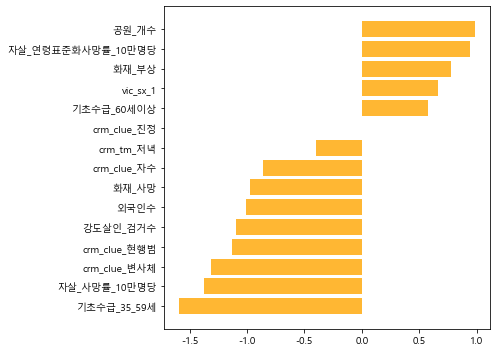

In [21]:
plot_coef(X_train.columns, np.ravel(svr.coef_) )
plt.savefig('../이미지/변수영향도_강도살인안전도.png', dpi=200,bbox_inches='tight')